### Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
age = np.array([], dtype=int)
sex = np.array([], dtype=int)
bmi = np.array([], dtype=float)
children = np.array([], dtype=int)
smoker = np.array([], dtype=int)
region = np.array([], dtype=int)
charges = np.array([], dtype=float)

with open('./dataset_home.txt', 'r') as file:
    for human in file.readlines():
        human = human.split(',')
        
        age = np.append(age, int(human[0]))

        if human[1] == 'male':
            sex = np.append(sex, 1)
        else:
            sex = np.append(sex, 0)
            
        bmi = np.append(bmi, float(human[2]))
        
        children = np.append(children, int(human[3]))
        
        if human[4] == 'yes':
            smoker = np.append(smoker, 1)
        else:
            smoker = np.append(smoker, 0)
            
        if human[5] == 'northeast':
            region = np.append(region, 1)
        elif human[5] == 'northwest':
            region = np.append(region, 2)
        elif human[5] == 'southeast':
            region = np.append(region, 3)
        elif human[5] == 'southwest':
            region = np.append(region, 4)
        else:
            region = np.append(region, 0)
            
        charges = np.append(charges, float(human[6]))    

Проверим корректность данных:

In [3]:
cols = {'age':age, 'sex':sex, 'bmi':bmi, 'children':children, 
        'smoker':smoker, 'region':region, 'charges':charges}

for col in cols.values():
    print(len(col), end=' ')

670 670 670 670 670 670 670 

In [4]:
for col in cols.values():
    print(col[:10])

[20 44 47 26 19 52 32 57 59 36]
[0 1 0 0 0 0 0 1 1 1]
[28.975 31.35  33.915 28.785 28.3   37.4   17.765 27.94  41.14  28.595]
[0 1 3 0 0 0 2 1 1 3]
[0 1 0 0 1 0 1 0 1 0]
[2 1 2 1 4 4 2 3 3 2]
[ 2257.47525 39556.4945  10115.00885  3385.39915 17081.08     9634.538
 32734.1863  11554.2236  48970.2476   6548.19505]


### Анализ данных

Найдем средние и медианные значения:

In [5]:
for col in cols:
    print(f'{col.upper()}: Среднее:{np.mean(cols[col]).round(1)}, Медиана:{np.median(cols[col]).round(1)}')

AGE: Среднее:38.4, Медиана:37.0
SEX: Среднее:0.5, Медиана:0.0
BMI: Среднее:30.2, Медиана:29.9
CHILDREN: Среднее:1.1, Медиана:1.0
SMOKER: Среднее:0.2, Медиана:0.0
REGION: Среднее:2.5, Медиана:2.0
CHARGES: Среднее:12899.9, Медиана:9098.4


Построим гистограммы значений:

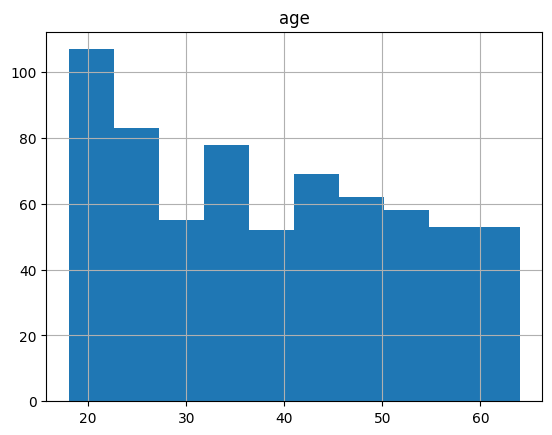

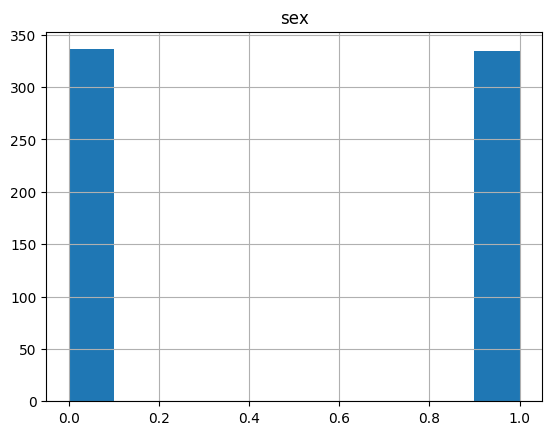

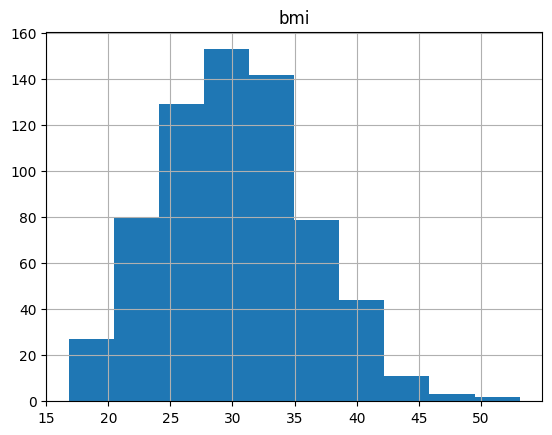

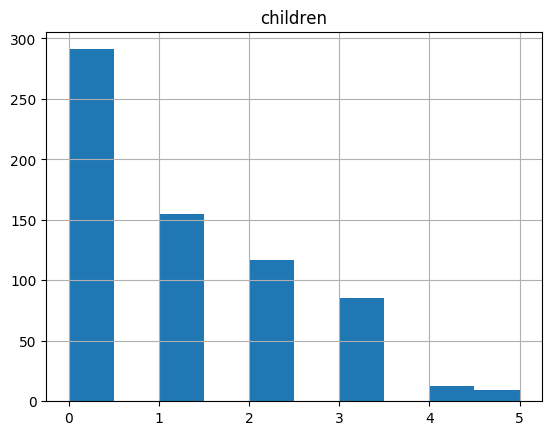

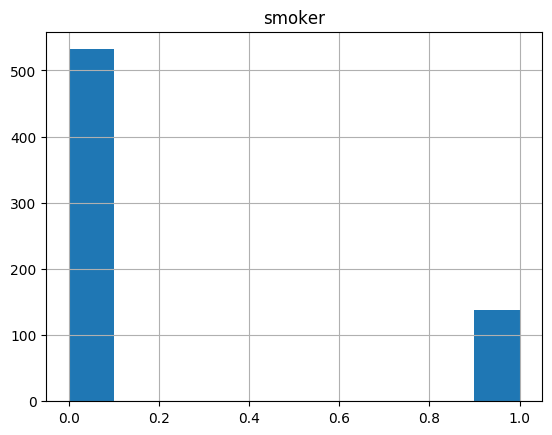

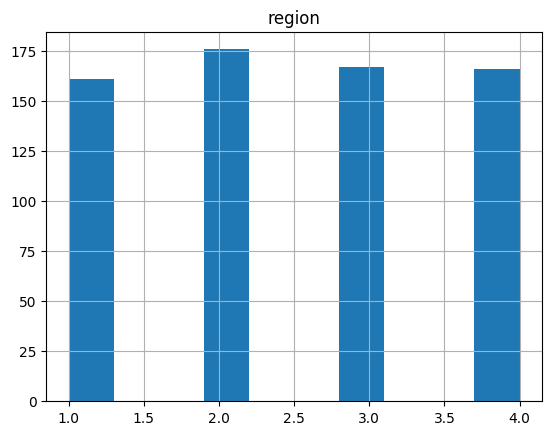

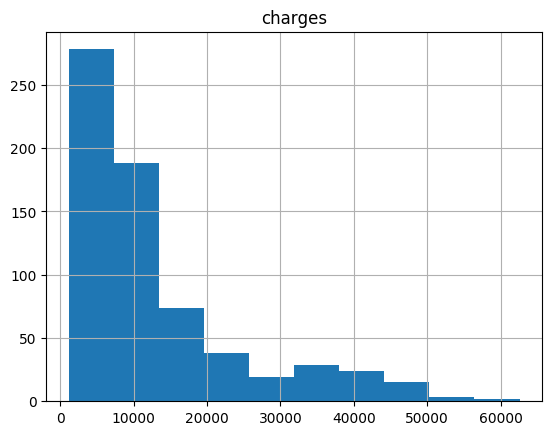

In [6]:
for col in cols:
    plt.hist(cols[col])
    plt.title(col)
    plt.grid()
    plt.show()

- Возраст: чаще всего в выборке встречаются люди, возраст которых 20-30 лет
- Пол: равное соотношение
- ИМТ: в основном распределен в границах 23-35
- Дети: больше всего лиц без детей, количество уменьшается с увеличением кол-ва детей
- Курение: курящих в 4 раза меньше, чем некурящих
- Регион: равное соотношение
- Расходы: в пределех 15000

Построим графики зависимостей признаков от расходов на страховку (целевой признак):

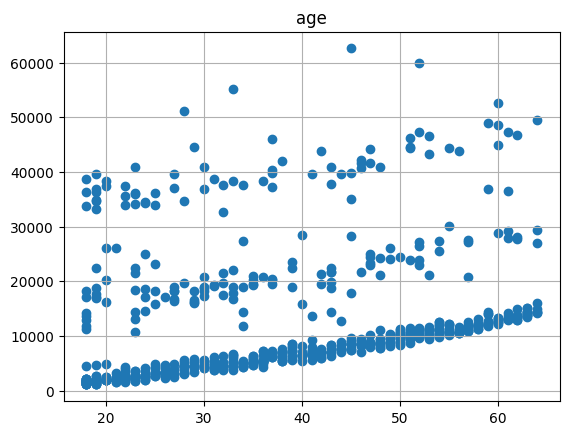

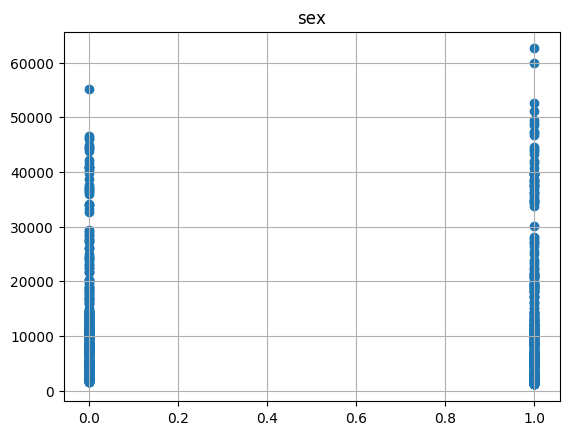

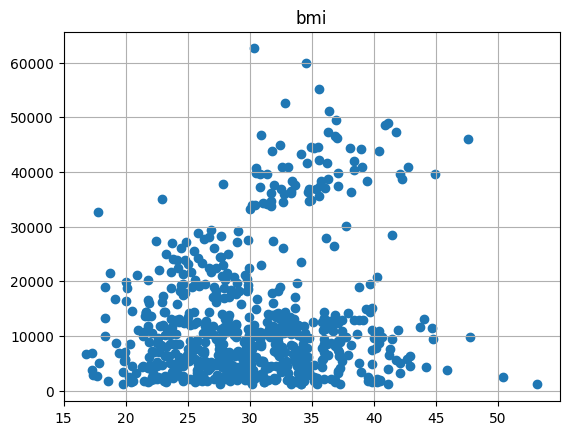

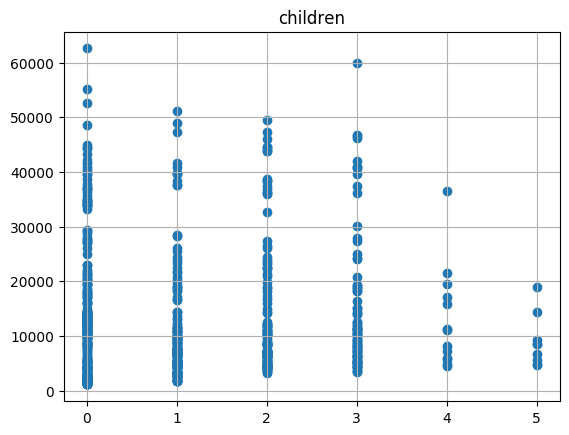

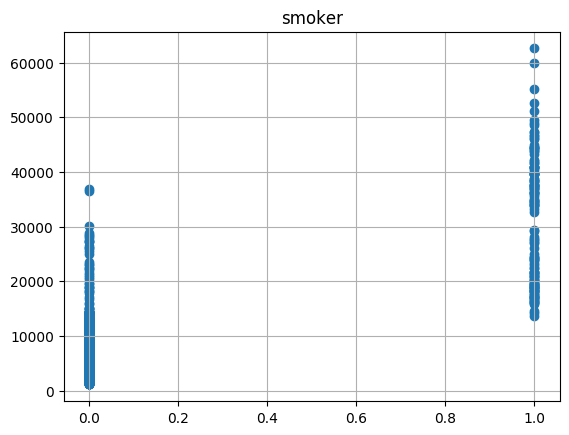

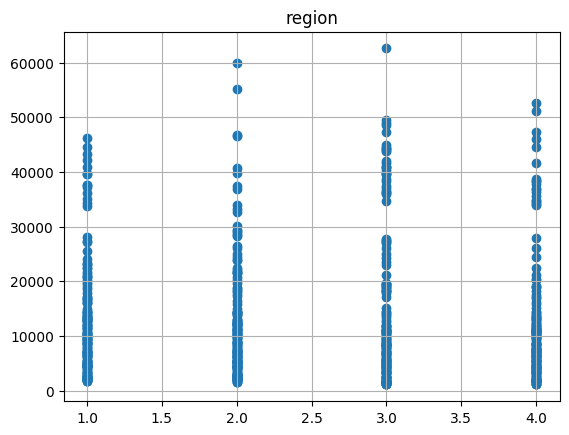

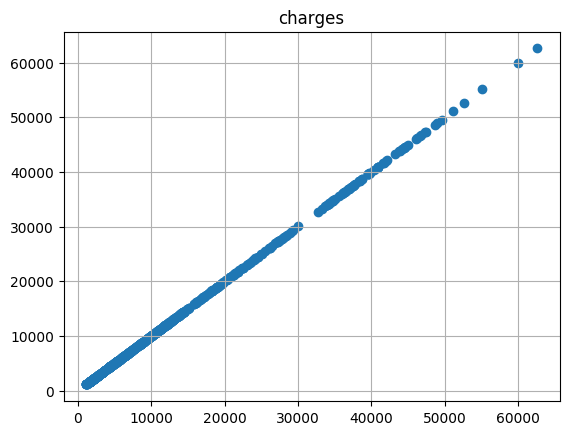

In [7]:
for col in cols:
    plt.scatter(cols[col], cols['charges'])
    plt.title(col)
    plt.grid()
    plt.show()

Вышеуказанные графики не в полной мере дают представления о расходах отдельных групп, поэтому отдельно посмотрим на посчитаем их медианы (менее чувствительна к выбросам в отличие от среднего):

In [8]:
print(f'Возрастная группа: до 30 лет, медиана расходов: {np.median(charges[age<31])}')
print(f'Возрастная группа: 31-45 лет, медиана расходов: {np.median(charges[age>30][age[age>30]<46])}')
print(f'Возрастная группа: более 45 лет, медиана расходов: {np.median(charges[age>45])}')

Возрастная группа: до 30 лет, медиана расходов: 3487.44005
Возрастная группа: 31-45 лет, медиана расходов: 7050.33165
Возрастная группа: более 45 лет, медиана расходов: 11941.694325


In [9]:
print(f'Пол: мужской, медиана расходов: {np.median(charges[sex==1])}')
print(f'Пол: женский, медиана расходов: {np.median(charges[sex==0])}')

Пол: мужской, медиана расходов: 8804.83945
Пол: женский, медиана расходов: 9494.538975


In [10]:
print(f'ИМТ: до 23, медиана расходов: np.median(charges[bmi<24])')
print(f'ИМТ: 24-35, медиана расходов: np.median(charges[bmi>23][bmi[bmi>23]<36])')
print(f'ИМТ: более 35, медиана расходов: np.median(charges[bmi>35])')

ИМТ: до 23, медиана расходов: np.median(charges[bmi<24])
ИМТ: 24-35, медиана расходов: np.median(charges[bmi>23][bmi[bmi>23]<36])
ИМТ: более 35, медиана расходов: np.median(charges[bmi>35])


In [11]:
for i in range(6):
    print(f'Кол-во детей: {i}, медиана расходов: {np.median(charges[children==i])}')

Кол-во детей: 0, медиана расходов: 10338.9316
Кол-во детей: 1, медиана расходов: 7623.518
Кол-во детей: 2, медиана расходов: 8978.1851
Кол-во детей: 3, медиана расходов: 10560.4917
Кол-во детей: 4, медиана расходов: 11015.1747
Кол-во детей: 5, медиана расходов: 8582.3023


In [12]:
print(f'Курящие, медиана расходов: {np.median(charges[smoker==1])}')
print(f'Некурящие, медиана расходов: {np.median(charges[smoker==0])}')

Курящие, медиана расходов: 33520.118749999994
Некурящие, медиана расходов: 7139.382575


In [13]:
for i in range(1,5):
    print(f'Регион: {i}, медиана расходов: {np.median(charges[region==i])}')

Регион: 1, медиана расходов: 9957.7216
Регион: 2, медиана расходов: 8796.229449999999
Регион: 3, медиана расходов: 9377.9047
Регион: 4, медиана расходов: 8535.6865


### Выводы
- Возраст: положительная корреляция с расходами, рост расходов с возрастом
- Пол: женщины тратят несколько больше, чем мужчины
- ИМТ: положительная корреляция, ожирение сопровождается более высокими расходами
- Дети: рост расходов при увеличении кол-ва детей, при этом высокие расходы у неимеющих детей, и ниже среднего у имеющих 5 детей (возможно для этой группы недостаточно данных, чтобы говорить о статистической значимости такого вывода)
- Курение: положительная корреляция, расходы курящих более чем в 3 раза выше, чем у некурящих
- Регион: несколько больше расходы у восточных регионов, чем у западных, и у северных, нежели у южных